In [1]:
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('dataset.csv')


Outliers Detected Using IQR Method:
209    3051.0
210    2862.0
211    2811.0
212    2698.0
213    2458.0
214    2260.0
215    2093.0
252    2306.0
253    2010.0
258    2902.0
259    2643.0
260    2354.0
261    2029.0
264    3480.0
265    3227.0
266    2987.0
267    2648.0
268    2287.0
269    2100.0
270    2356.0
271    2063.0
276    2451.0
277    2302.0
278    2024.0
281    4474.0
282    3231.0
283    2934.0
284    2693.0
285    2408.0
286    2149.0
388    2141.0
389    2102.0
390    2030.0
444    2212.0
450    2022.0
456    2197.0
462    3040.0
463    2413.0
464    2445.0
465    2134.0
468    2683.0
469    2519.0
470    2362.0
471    2014.0
Name: Cs, dtype: float64

Outliers Detected Using Z-score Method:
209    3051.0
210    2862.0
211    2811.0
212    2698.0
258    2902.0
259    2643.0
264    3480.0
265    3227.0
266    2987.0
267    2648.0
281    4474.0
282    3231.0
283    2934.0
284    2693.0
462    3040.0
468    2683.0
Name: Cs, dtype: float64


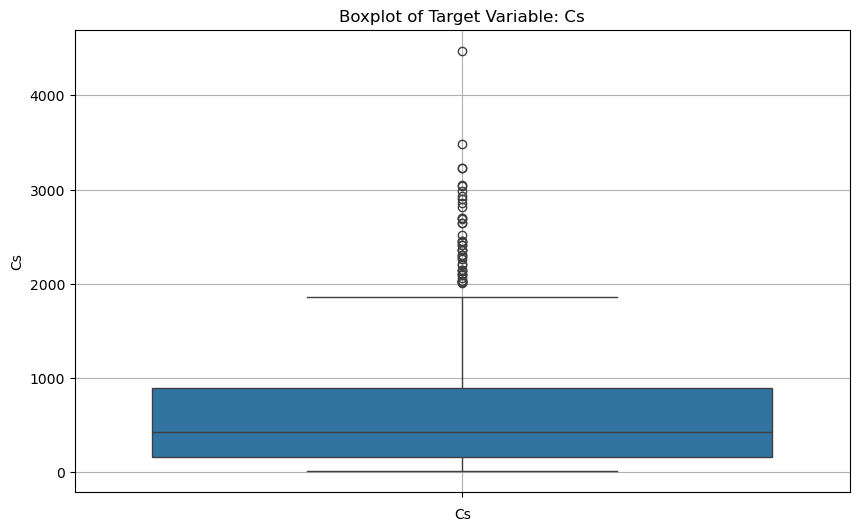

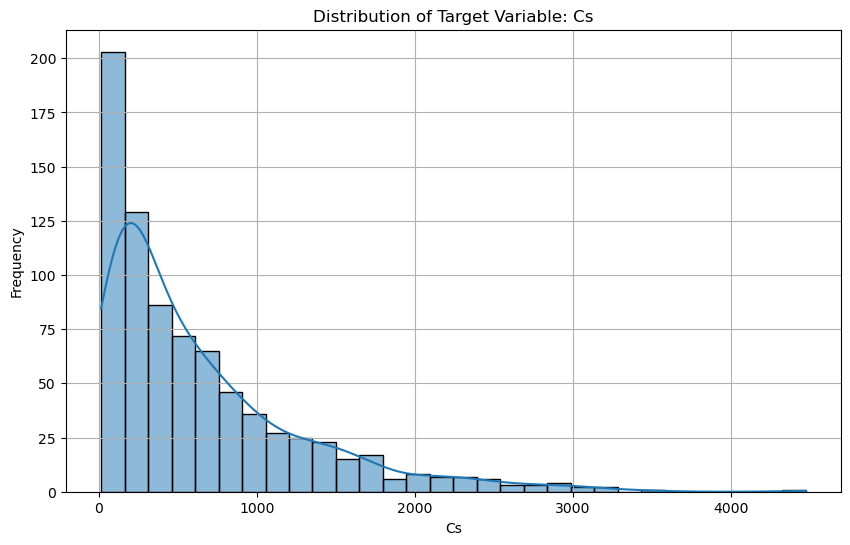

In [2]:
# 用 IQR 或 Z-score 方法检测异常值
def detect_outliers(data, method='iqr', threshold=1.5):
    outliers = []
    if method == 'iqr':
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data < Q1 - threshold * IQR) | (data > Q3 + threshold * IQR)]
    elif method == 'z-score':
        z_scores = (data - data.mean()) / data.std()
        outliers = data[abs(z_scores) > threshold]
    return outliers


# 检测 'Cs' 列的异常值
outliers_iqr = detect_outliers(data['Cs'], method='iqr', threshold=1.5)
outliers_z_score = detect_outliers(data['Cs'], method='z-score', threshold=3)

# 输出异常值(含索引)
print("\nOutliers Detected Using IQR Method:")
print(outliers_iqr)
print("\nOutliers Detected Using Z-score Method:")
print(outliers_z_score)

# 将异常值(含索引)输出到csv文件
outliers_iqr.to_csv('outliers_iqr.csv', index=True)
outliers_z_score.to_csv('outliers_z_score.csv', index=True)

# 绘制 'Cs' 列的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(data['Cs'])
plt.title('Boxplot of Target Variable: Cs')
plt.xlabel('Cs')
plt.grid(True)
plt.show()

# 绘制 'Cs' 列的直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['Cs'], kde=True, bins=30)
plt.title('Distribution of Target Variable: Cs')
plt.xlabel('Cs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [3]:
# 将 IQR 异常值整条记录删除并保存新数据集
data_cleaned_iqr = data.drop(outliers_iqr.index)
data_cleaned_iqr.to_csv('dataset_cleaned.csv', index=False)

# 将 Z-score 异常值整条记录删除并保存新数据集
data_cleaned_z_score = data.drop(outliers_z_score.index)
data_cleaned_z_score.to_csv('dataset_cleaned.csv', index=False)